<a href="https://colab.research.google.com/github/siddhi5386/Emotion-Recognition-from-brain-EEG-signals-/blob/master/emotion%20recognition%20by%20lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-g4wdmyve
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-g4wdmyve
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28133 sha256=2bfab0d7680fcd495d754699f7aeb02b9625feceef401199400217b17ba5920b
  Stored in directory: /tmp/pip-ephem-wheel-cache-31w0z1pi/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg


In [ ]:
from scipy import stats
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pywt

In [ ]:
os.getcwd()
os.chdir('/content/drive/MyDrive')

In [ ]:
channel = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
band = [4,8,12,16,25,45] 
window_size = 256
step_size = 64
sample_rate = 128 
subjectList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']


In [ ]:
def Discrete_wavelet_transform (sub, channel, band, window_size, step_size, sample_rate):
   
    meta = []
    with open("/content/drive/MyDrive/BTP/data_preprocessed_python/s" + sub + '.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') 
        for i in range (0,40):
            # loop over 0-39 trails

            data = subject["data"][i]
            labels = subject["labels"][i]
            start = 0;
            
            while start + window_size < data.shape[1]:
                meta_array = []
                meta_data = [] 
                for j in channel:
                    Y = []
                    X = data[j][start : start + window_size] 
                    coeffs = pywt.wavedec(X, 'db4', level=6)
      
                    cA6, cD6, cD5,cD4,cD3,cD2,cD1 = coeffs
                    scD3 = np.std(cD3)
                    scD2 = np.std(cD2)
                    scD1 = np.std(cD1)
                    
                    Ent_cD3 = stats.entropy(np.square(cD3))
                    Ent_cD2 = stats.entropy(np.square(cD2))
                    Ent_cD1 = stats.entropy(np.square(cD1))

                    Ene_cD3 = np.sum(np.square(cD3))
                    Ene_cD2 = np.sum(np.square(cD2))
                    Ene_cD1 = np.sum(np.square(cD1))


                    
                    Y = [Ent_cD1, Ent_cD2, Ent_cD3, scD1, scD2, scD3, Ene_cD1, Ene_cD2, Ene_cD3]
                    
                    meta_data = meta_data + list(Y)

                meta_array.append(np.array(meta_data))
                meta_array.append(labels)

                meta.append(np.array(meta_array))    
                start = start + step_size
                
        meta = np.array(meta)
        np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/s' + sub, meta, allow_pickle=True, fix_imports=True)

In [ ]:
for subject in subjectList:
  Discrete_wavelet_transform (subject, channel, band, window_size, step_size, sample_rate)

In [ ]:
data_training = []
label_training = []
data_testing = []
label_testing = []

for i in range(new_total_samples.shape[0]):
  if i%4==0:
    data_testing.append(new_total_samples[i])
    label_testing.append(total_labels[i])
  else:
    data_training.append(new_total_samples[i])
    label_training.append(total_labels[i])

np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)


np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (73200, 114) (73200, 4)
testing dataset: (24400, 114) (24400, 4)


In [ ]:

with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [1]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

In [ ]:
X.shape

(73200, 114)

In [ ]:
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = np.array(X[:])

In [ ]:

with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [1]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

In [ ]:
x_test = np.array(M[:])

In [ ]:
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(L)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train.shape

(73200, 114, 1)

In [ ]:
x_train[1]

In [ ]:

batch_size = 256
num_classes = 10
input_shape=(x_train.shape[1], 1)

In [ ]:

print(input_shape)

(114, 1)


In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [ ]:
  from keras.regularizers import l2
  from keras.layers import Bidirectional
  from keras.layers import LSTM

  model = Sequential()
 
  model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
  model.add(Dropout(0.6))

  model.add(LSTM(units = 256, return_sequences = True))  
  model.add(Dropout(0.6))

  model.add(LSTM(units = 64, return_sequences = True))  
  model.add(Dropout(0.6))

  model.add(LSTM(units = 64, return_sequences = True))  
  model.add(Dropout(0.4))

  model.add(LSTM(units = 32))
  model.add(Dropout(0.4))

  model.add(Dense(units = 16))
  model.add(Activation('relu'))

  model.add(Dense(units = num_classes))
  model.add(Activation('softmax'))
  model.compile(optimizer ="adam", loss =keras.losses.categorical_crossentropy,metrics=["accuracy"])
  model.summary()
  m=model.fit(x_train, y_train,epochs=200,batch_size=256,verbose=1,validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1525/1525 [==============================] - 15s 8ms/step - loss: 0.8731 - accuracy: 0.7195
Test loss: 0.8731362819671631
Test accuracy: 0.7194672226905823


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


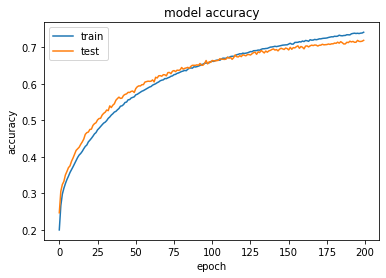

In [ ]:
import matplotlib.pyplot as plt
print(m.history.keys())
# summarize history for accuracy
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


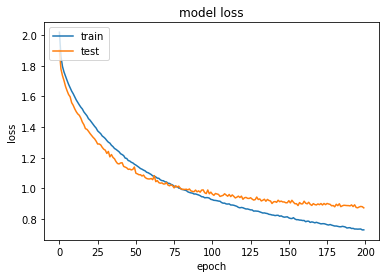

In [ ]:
# summarize history for loss
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

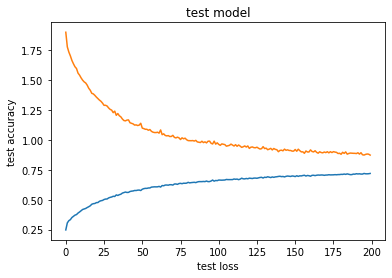

In [ ]:
plt.plot(m.history['val_accuracy'])
plt.plot(m.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

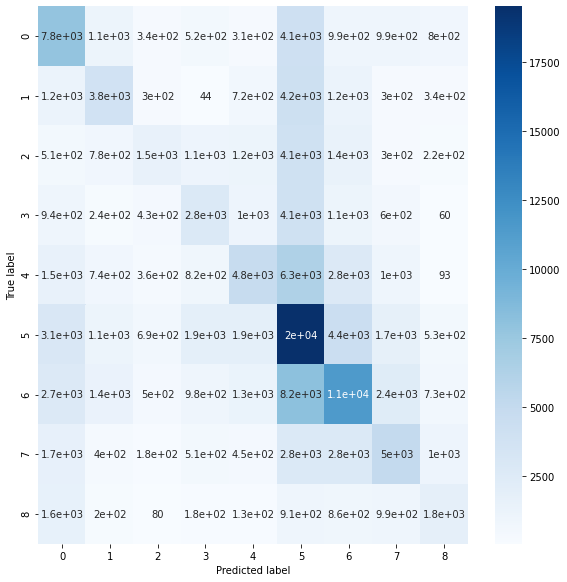

In [ ]:
y_pred=model.predict_classes(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np
y_test=np.argmax(y_test, axis=1)
cmatrix=confusion_matrix(y_test, y_pred)
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()